In [17]:
###Enviornment Setup
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
%matplotlib inline

In [18]:
### Download Data from Yahoo Finance
start = dt.datetime(2020,1,1)
end = dt.datetime(2021,12,31)
aapl = web.DataReader('AAPL','yahoo', start=start, end=end)
aapl.to_csv(r'C:/data/AAPL_Prices.csv')
print(aapl)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-01-02   75.150002   73.797501   74.059998   75.087502  135480400.0   
2020-01-03   75.144997   74.125000   74.287498   74.357498  146322800.0   
2020-01-06   74.989998   73.187500   73.447502   74.949997  118387200.0   
2020-01-07   75.224998   74.370003   74.959999   74.597504  108872000.0   
2020-01-08   76.110001   74.290001   74.290001   75.797501  132079200.0   
...                ...         ...         ...         ...          ...   
2021-12-27  180.419998  177.070007  177.089996  180.330002   74919600.0   
2021-12-28  181.330002  178.529999  180.160004  179.289993   79144300.0   
2021-12-29  180.630005  178.139999  179.330002  179.380005   62348900.0   
2021-12-30  180.570007  178.089996  179.470001  178.199997   59773000.0   
2021-12-31  179.229996  177.259995  178.089996  177.570007   64025500.0   

             Adj Close  

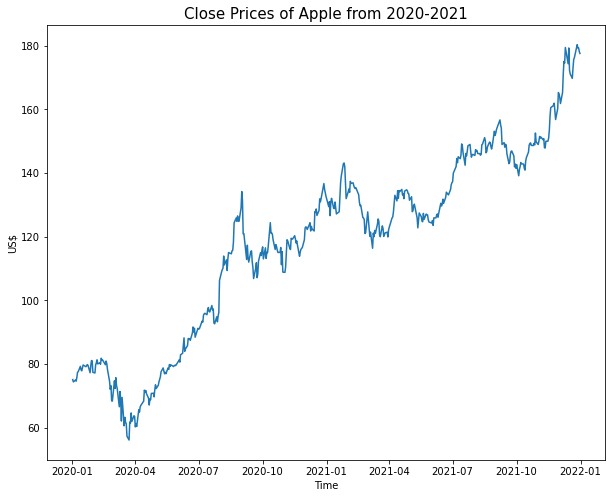

In [19]:
###Plot the stock price
plt.figure(figsize=(10, 8))
plt.title("Close Prices of Apple from 2020-2021", size=15)
plt.xlabel("Time")
plt.ylabel("US$")
plt.plot(aapl.loc[:,'Close'])

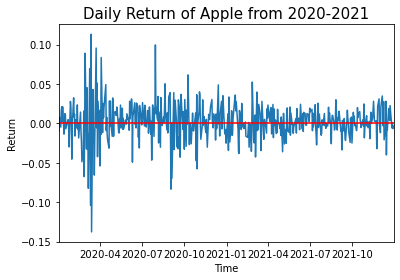

In [20]:
###Calculate Ln()returns and plot returns
aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])
plt.title("Daily Return of Apple from 2020-2021", size=15)
plt.xlabel("Time")
plt.ylabel("Return")
plt.xlim(aapl.index[0],aapl.index[-1])
plt.plot(aapl.loc[:, 'LogReturn'])
plt.axhline(0, color='red')

<AxesSubplot:title={'center':'Histogram of Daily Return of Apple from 2020-2021'}>

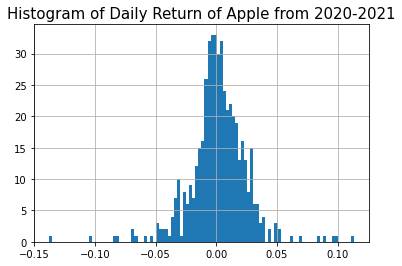

In [21]:
### Histogram of Daily Return
plt.title("Histogram of Daily Return of Apple from 2020-2021", size=15)
aapl.loc[:,'LogReturn'].dropna().hist(bins=100)

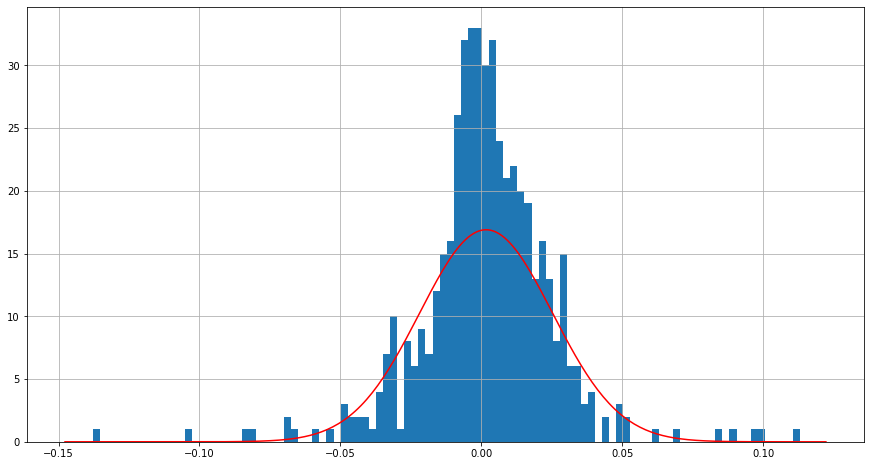

In [22]:
### Visualize the returnts in normal distribution
mu = aapl['LogReturn'].mean()
sigma = aapl['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(aapl['LogReturn'].min()-0.01, aapl['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

aapl['LogReturn'].hist(bins=100, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [23]:
### Determind probability that the stock price will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.014264437564542199


In [24]:
### Determind probability that the stock price will drop over 10% in a day
prob_return1 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  8.25383464770679e-06


In [25]:
## Drop over 40% in 365 days(next year)
mu365 = 365*mu
sigma365 = (365**0.5) * sigma
print('The probability of dropping over 40% in 365 days is ', norm.cdf(-0.4, mu365, sigma365))

The probability of dropping over 40% in 365 days is  0.011648237264946343


In [26]:
## Drop over 20% in 365 days
mu365 = 365*mu
sigma365 = (365**0.5) * sigma
drop20 = norm.cdf(-0.2, mu365, sigma365)
print('The probability of dropping over 20% in 365 days is ', drop20)

The probability of dropping over 20% in 365 days is  0.03398734754424376


Value at Risk(VaR) defined as the maximum dollar amount expected to be lost over a given time horizon, at a pre-defined confidence level.

For example, if the 95% one day VaR is -3.7%, there is 95% confidence that over the next day, Apple stock won't drop over 3.7%.

In [27]:
### VaR Calculation
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma)) #95% of VaR level, 
# 25% quantile
print('25% quantile ', norm.ppf(0.25, mu, sigma)) #75% of VaR level
# 50% quantile
print('50% quantile ', norm.ppf(0.5, mu, sigma)) #50% of VaR level
# 75% quantile
print('75% quantile ', norm.ppf(0.75, mu, sigma)) #25% of VaR level
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma)) #5% of VaR level


5% quantile  -0.03712976535406479
25% quantile  -0.014217981216279678
50% quantile  0.0017077595597620164
75% quantile  0.01763350033580371
95% quantile  0.040545284473588815


In [28]:
### Confidence Interval
# 90% of confidence interval for returns
n = aapl['LogReturn'].shape[0]
sample_mean = aapl['LogReturn'].mean()
sample_std = aapl['LogReturn'].std(ddof=1)
normalized_sample_std = sample_std / n**0.5

# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = (sample_mean+z_left*normalized_sample_std)*100
interval_right = (sample_mean+z_right*normalized_sample_std)*100

# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is', interval_left,'percent','to', interval_right,'percent')

90% confidence interval is -0.002048761580795435 percent to 0.3436006735331986 percent


In [29]:
### Two Tailed test
# Hypothesis Setting:
# H0:μ=0  Ha:μ≠0
# H0 means the average stock return is 0 , H1 means the average stock return is not equal to 0
# Calculate test statistic (T-test) 
# (if the sample is large enough, we can use Z-test)
Z_hat = (sample_mean - 0)/(sample_std/n**0.5)
print('The test statistic is:',Z_hat)
# Set desicion criteria
# confidence level is 85%
alpha = 0.15
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print('T-stats range is {} to {}'.format(zleft, zright))
##Make decision - shall we reject H0?
print('Therefore, at significant level of {}, shall we reject: {}'.format(alpha, Z_hat>zright or Z_hat<zleft))

The test statistic is: 1.6253546052573171
T-stats range is -1.4395314709384563 to 1.4395314709384563
Therefore, at significant level of 0.15, shall we reject: True


In [30]:
## Alternative decision method: P-value and Make Decision
p = 1 - norm.cdf(Z_hat, 0, 1)
print('P-Value is', p)
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

P-Value is 0.0520435112687081
At significant level of 0.15, shall we reject: True


In [31]:
### One Tailed Test
# Hypothesis Setting:
# H0:μ≤0   Ha:μ>0 
# H0 means the average stock return is less than or equal to zero 
# H1 means the average stock return is greater than zero
# Calculate test statistic (T-test) 
# (if the sample is large enough, we can use Z-test)
Z_hat = (sample_mean - 0)/(sample_std/n**0.5)
print('The test statistic is:',Z_hat)
# Set desicion criteria
# Confidence level is 90%
alpha = 0.1
zright = norm.ppf(1-alpha, 0, 1) 
print('The T-stats of alpha is:',zright)
##Make decision - shall we reject H0?
print('Therefore, at significant level of {}, shall we reject: {}'.format(alpha, Z_hat>zright))


The test statistic is: 1.6253546052573171
The T-stats of alpha is: 1.2815515655446004
Therefore, at significant level of 0.1, shall we reject: True


In [32]:
### Export the results as CSV file
aapl.to_csv(r'C:/data/Apple_VaR.csv')